<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: Nutri-Grade labels

---
## Problem Statement
Singaporeans are living longer but spending more time in ill-health. There are top 3 chronic medical conditions that Singaporeans suffer from are: Hypertension, Diabetes and Hyperlipidemia<br>

There are 3 main ways to prevent chronic illness:
- Physical Activity (Engage in at least 150-300 minutes of moderate-intensity aerobic activity in a week)
- Diet (Consume the receommended dietary allowances for sugar, saturated fat and salt)
- Healthy life choices (Avoid tobacco and excessive drinking)<br>

We will focus on the diet portion. More than half of Singaporeans’ daily sugar intake comes from beverages. This is why the government has came up with a nutri-grade labelling system in hopes that Singaporeans will reduce their sugar intake by making heatheir choices when choosing which drink to buy. However the nutrigrade labels only take into account trans fat and sugar and do not provide a holistic picture of the health of the drinks. Is there a way to create a more comprehensive indicator of how healthy drinks are?

## Contents:
- [EDA: Exploring the Dataset for interesting insights](#EDA:-Exploring-the-Dataset-for-interesting-insights)
- [Dataset Used](#Dataset-Used)
- [Workflow and Key Questions](#Workflow-and-Key-Questions)
- [Import libraries](#Import-libraries)
- [Import data](#Import-data)
- [Categorising the Drinks](#Categorising-the-Drinks)
- [Drilling down by drink type](#Drilling-down-by-drink-type)
- [Visualising Outliers in the drink_type dataframe](#Visualising-Outliers-in-the-drink_type-dataframe)
- [Computing Summary of Nutrients by Drink Type](#Computing-Summary-of-Nutrients-by-Drink-Type)
- [Gaps in Singaporean's diets](#Gaps-in-Singaporean's-diets)
- [Fibre](#Fibre)
- [Energy (Calories)](#Energy (Calories))
- [Protein](#Protein)
- [Action points based on the EDA](#Action-points-based-on-the-EDA)
- [Action points to NTUC](#Action-points-to-NTUC)
- [Conclusion](#Conclusion)

## **EDA: Exploring the Dataset for interesting insights**

Now that we have a (mostly) clean dataset, let us explore it to see if there are any insights or recommendations we can draw from it. This EDA will incorporate insights gained from the dataset with secondary research to provide some recommendations to the HPB.

It is worth noting that our proposed label is going to include sugar, saturated fat, and sodium contents. The current nutrigrade labels include augar and saturated fat, and the HPB is currently shifting it's focus to sodium contents which will be covered by our label. As such, it would be more interesting to explore other nutrients that are not currently under scrutiny in this EDA. This will help the final recommendations to be more comprehensive, and will provide a more action points to the HPB.

**Note:** In keeping with the theme of the problem statement, the EDA will focus mainly on social impact, i.e., and the recommendations will be centered around improving the nutritional intake of Singaporeans. Hence, the EDA will be focused on nutritional values. Some brand recommendations will be given to NTUC, but this is not the primary focus of the EDA.


## Dataset Used

-  This file uses the dataset model_EDA_csv. 

## Workflow and Key Questions

Here is a summary of the workflow and key questions that this EDA seeks to answer:

1. Importing the packages, the dataset, and some additional cleaning steps.
2. How can the drinks be grouped/categorised? Which are some of the most frequently occurring brands in the dataset?
3. It is well documented that Singaporeans need to reduce sugar, saturated fat, and especially sodium content in their diets. Are there any other gaps in a Singaporean's diet?
4. Are there beverages we can recommend to fill these gaps? Any general comments/ cautions about beverages?


# Import libraries

In [201]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter

# Import data

In [202]:
# importing the data
df = pd.read_csv ('../data/model_EDA_csv.csv')

In [218]:
df.head() # checking the df

,drink volume,drink name,attributes,quantity,volume,Serving Size_Cleaned,Added_Sugar_combined (g),protein_total (g),Calories (kcal),Fibre (g),...,cholesterol (mg),Sodium Content (mg),trans_fat_combined (g),saturated_fat_combined (g),monounsaturated_fat_combined (g),polyunsaturated_fat_combined (g),Combined_Sugar (g),Combined_Fat (g),nutrigrade,Drink Type
0,24 x 200ml (ctn),milo chocolate malt milk uht packet drink,per serving,24,200ml (ctn),NaN,0.0,1.7,0.0153,0.03,...,9500.0,60.0,0.001,0.0,0.0,0.0,0.5,0.9,B,Milk
1,12 x 320ml (ctn),coca-cola can drink - zero sugar,per serving (100ml),12,320ml (ctn),100ml,0.0,0.0,0.0000,0.00,...,0.0,8.0,0.000,0.0,0.0,0.0,0.0,0.0,A,Cola
2,6 x 180ml,coca-cola mini can drink - zero sugar,per serving (180ml),6,180ml,180ml,0.0,0.0,0.0000,0.00,...,0.0,11.0,0.000,0.0,0.0,0.0,0.0,0.0,A,Cola
3,24 x 325ml (ctn),100 plus isotonic can drink - original,per serving (100ml),24,325ml (ctn),100ml,0.0,0.0,27.0000,0.00,...,0.0,48.0,0.000,0.0,0.0,0.0,6.8,0.0,C,Sport
4,24 x 200ml (ctn),ribena blackcurrant fruit packet drink - regular,per serving (100g),24,200ml (ctn),100g,0.0,0.0,43.0000,0.00,...,0.0,0.0,0.000,0.0,0.0,0.0,10.5,0.0,D,Juice


In [204]:
# Pre processing: removing duplicate/unwanted columns
# 'cholesterol' and 'cholesterol (mg)' columns store the same information, w do not need both
# 'Combined Calories from Fat (kcal)', 'Total Calories (kcal)' columns contain mostly 0 values and measure the same thing as the 'calories (kcal) column'
df.drop(['Combined Calories from Fat (kcal)', 'Total Calories (kcal)', 'cholesterol'], axis = 1, inplace = True)

## Categorising the Drinks

Now that we have imported the dataset, let us try and group the drinks into different categories. To do this, a wordcloud can be built based on the 'drink name' column.

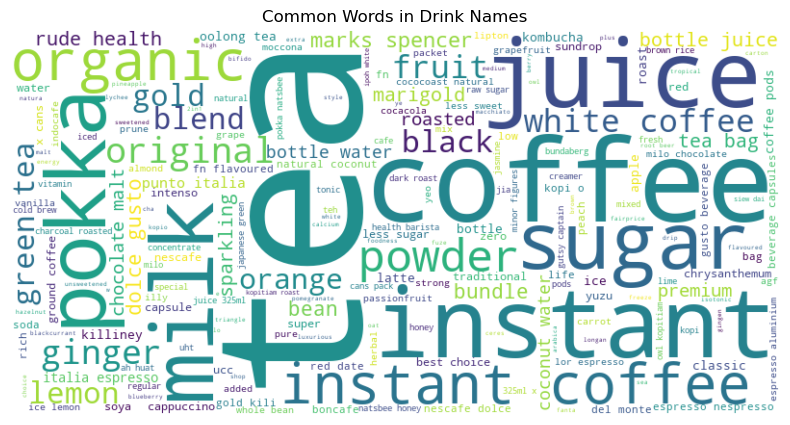

In [205]:
# Combine all drink names into a single string
drink_names = ' '.join(df['drink name'])

# Define a function to remove specific terms using regular expressions
def remove_terms(text):
    # Define a list of terms to remove (these terms are expected to occur very frequently in the data and will add litle value to the analysis)
    terms_to_remove = ['drink', 'bottle drink', 'packet drink', '-', '&']
    # Create a regular expression pattern to match these terms
    pattern = r'\b(?:' + '|'.join(re.escape(term) for term in terms_to_remove) + r')\b'
    # Use the pattern to replace the terms with an empty string
    return re.sub(pattern, '', text, flags=re.IGNORECASE)

# Apply the function to remove the terms
drink_names = remove_terms(drink_names)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(drink_names)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels
plt.title("Common Words in Drink Names")
plt.show()

## Interpreting the Word Cloud

**Categories:** The word cloud has given us a mix of the type of drinks that occur in our dataset. The most frequently occuring ones are:
-  Coffee
-  Tea
-  Juice
-  Milk
-  Cola/Soda
-  Water

**Note about adding categories to the dataset:** We have our categories. Now, how do we map them in? Sadly, it proved to be too time-consuming to map the categories in Python. There were too many edge cases (for instance some drink names had only the brand names in them. Which category will they fall under?) and the categories for a lot of row items had to be decided on a case-by-case basis. Thus, this mapping was faster to perform in the CSV file itself (which is why this EDA utilised a special version of the model_csv file with a manually added 'Drink Type' column). In the future, if this data is re-scraped, it can be scraped by category first and the drink type column can be added during the cleaning process. While mapping the categories, in addition to what the word cloud has, 2 more categories ('Sport' and 'Other') were identified and used.

**Brands:** The word cloud has also given us a mix of some of the most frequently occuring drink brands. The most frequently occuring ones are:
-  Pokka
-  Marigold
-  Yeo’s
-  Coca Cola
-  F&N
- Marks & Spencer
- Dolce Gusto (Nescafe)

Interestingly, the NTUC house brands do not occur frequently which is cause for concern given that the data has been scraped from the NTUC website. There could be a few potential reasons for this:
-  NTUC is not adequately marketing/pushing it's housebrand beverages.
-  The NTUC housebrands focus on other items like processed foods, vegetables, and poultry products.
-  Only a limited amount of data was scraped given the time constraints. It is possible that if more data was scraped, the NTUC housebrands would occur more frequently.


## Drilling down by drink type

Now that we have our categories made, we first create a dataframe to store and view nutrient contents by drink type.

In [206]:
# creating a df that stores nutrient infomration, the created drink types from the word cloud, and the drink names
drink_type = df.select_dtypes(include=['float64', 'int'])
drink_type [['drink_type', 'name']] = df[['Drink Type', 'drink name']]
# we do not need all drink types. Water is essential for humans, and it is not possible to give specific recommendations based on the 'Other' category
# we drop these row items
drink_type = drink_type[~drink_type['drink_type'].isin(['Water', 'Other'])]
drink_type.head() # checking the df

,Added_Sugar_combined (g),protein_total (g),Calories (kcal),Fibre (g),Carbohydrates,cholesterol (mg),Sodium Content (mg),trans_fat_combined (g),saturated_fat_combined (g),monounsaturated_fat_combined (g),polyunsaturated_fat_combined (g),Combined_Sugar (g),Combined_Fat (g),drink_type,name
0,0.0,1.7,0.0153,0.03,8.0,9500.0,60.0,0.001,0.0,0.0,0.0,0.5,0.9,Milk,milo chocolate malt milk uht packet drink
1,0.0,0.0,0.0000,0.00,0.0,0.0,8.0,0.000,0.0,0.0,0.0,0.0,0.0,Cola,coca-cola can drink - zero sugar
2,0.0,0.0,0.0000,0.00,0.0,0.0,11.0,0.000,0.0,0.0,0.0,0.0,0.0,Cola,coca-cola mini can drink - zero sugar
3,0.0,0.0,27.0000,0.00,6.8,0.0,48.0,0.000,0.0,0.0,0.0,6.8,0.0,Sport,100 plus isotonic can drink - original
4,0.0,0.0,43.0000,0.00,10.6,0.0,0.0,0.000,0.0,0.0,0.0,10.5,0.0,Juice,ribena blackcurrant fruit packet drink - regular


## Visualising Outliers in the drink_type dataframe

Box plots should help us visualise outliers by drink type.

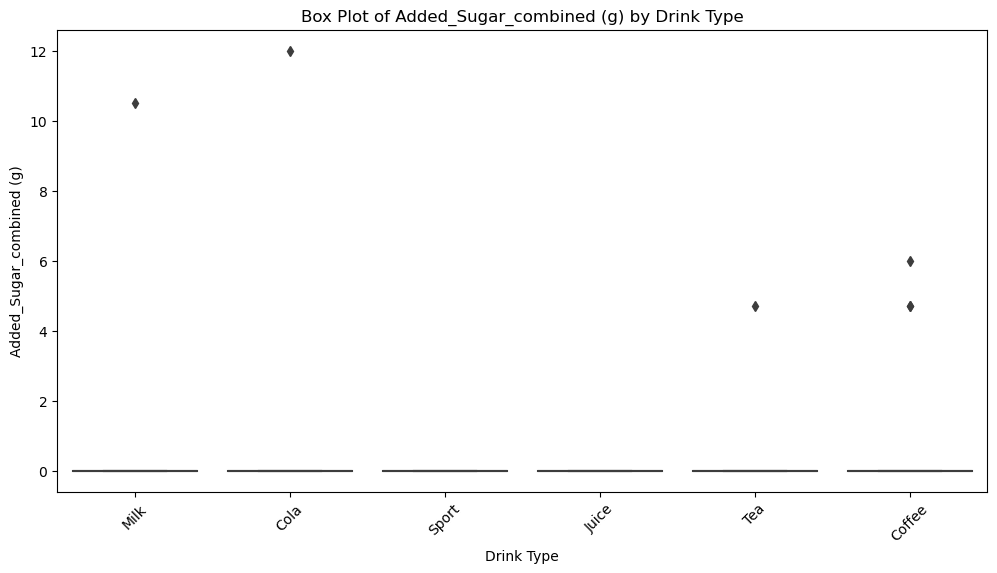

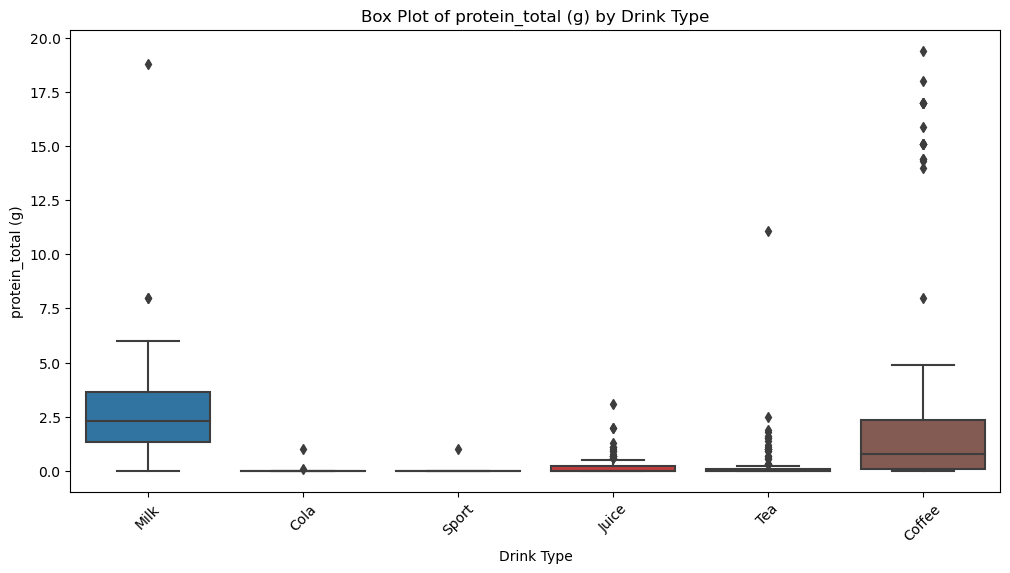

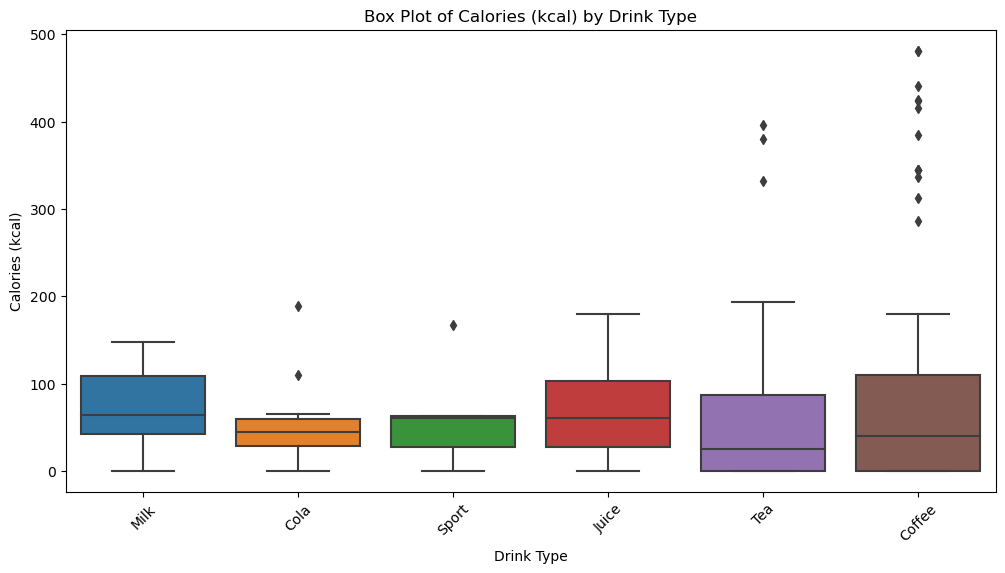

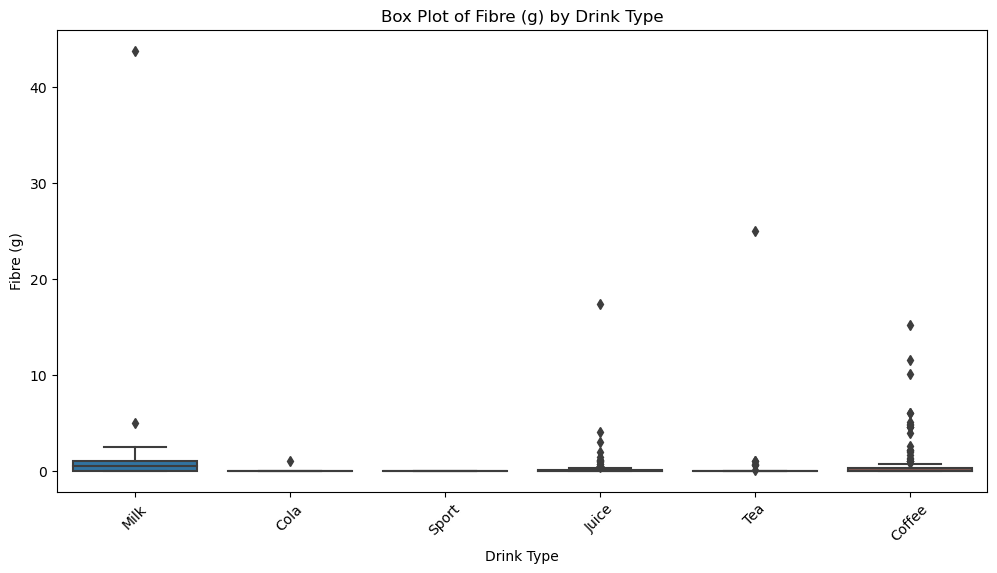

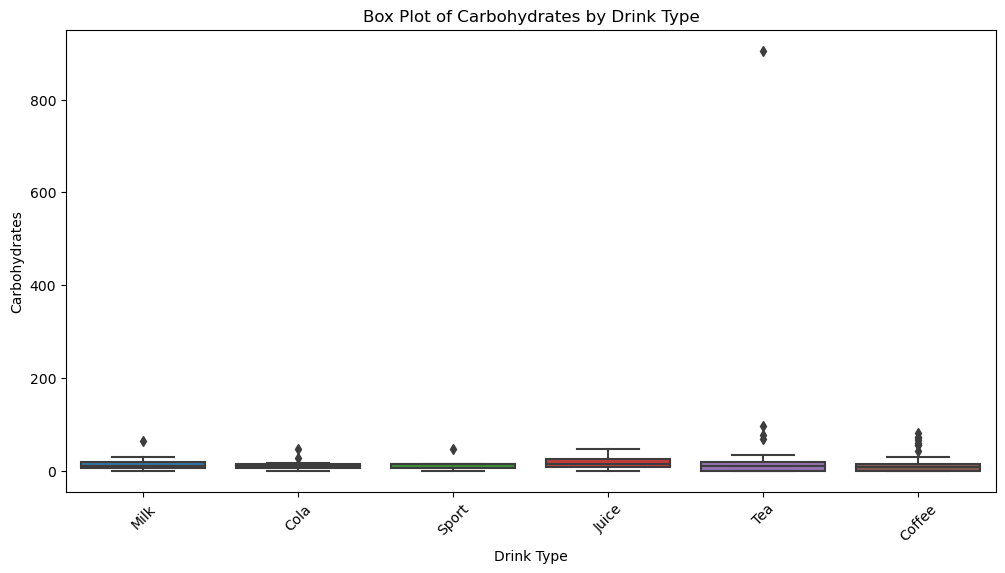

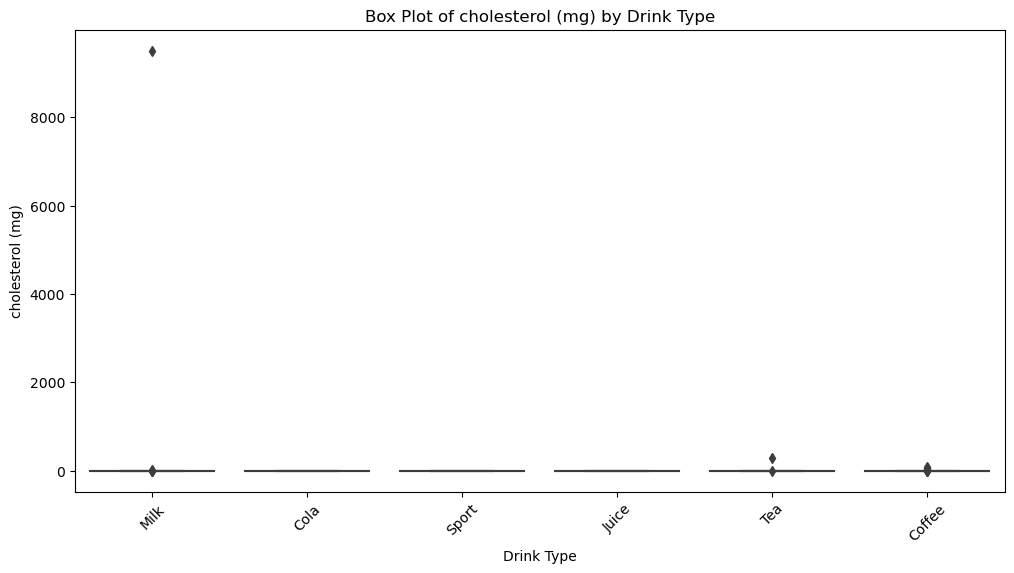

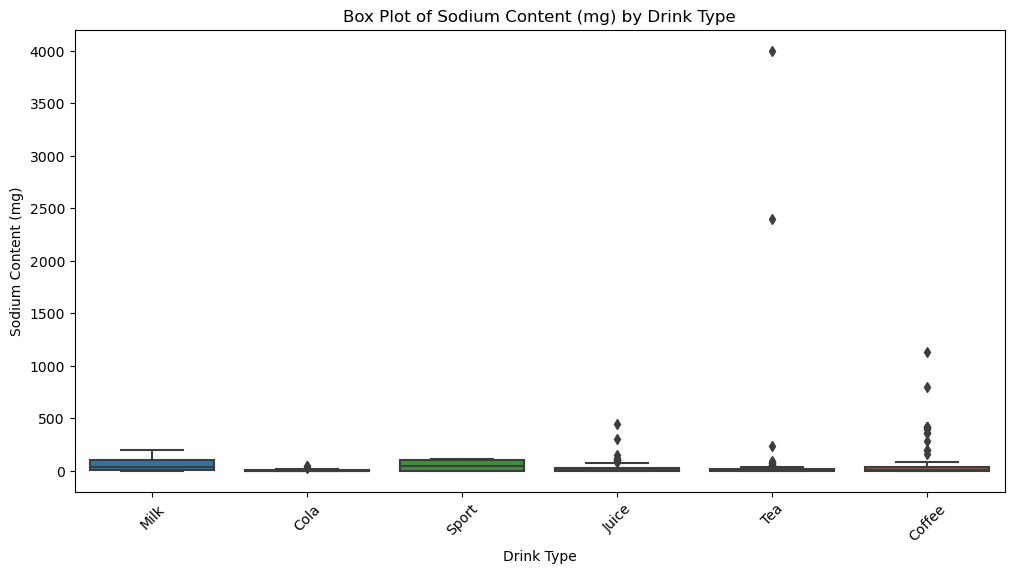

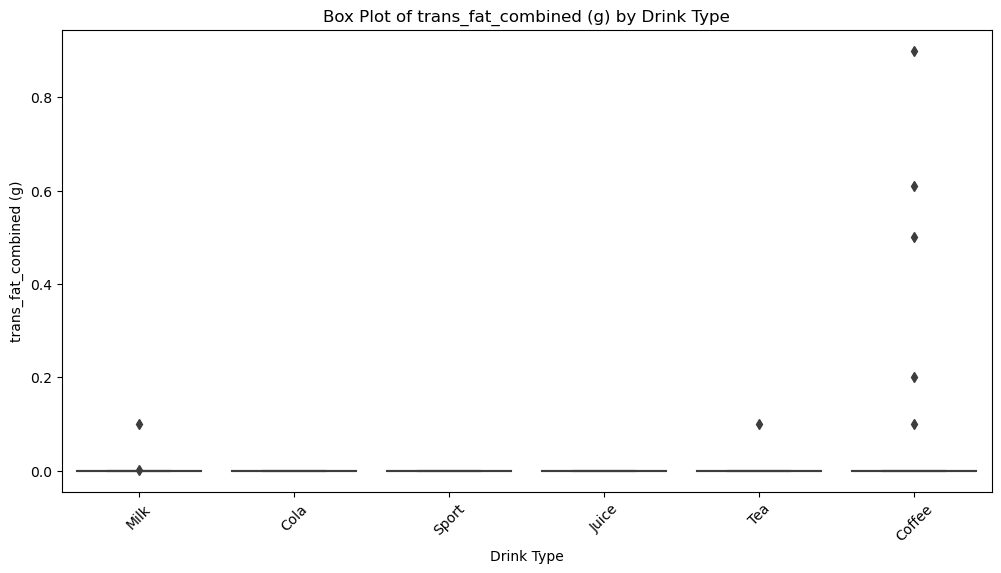

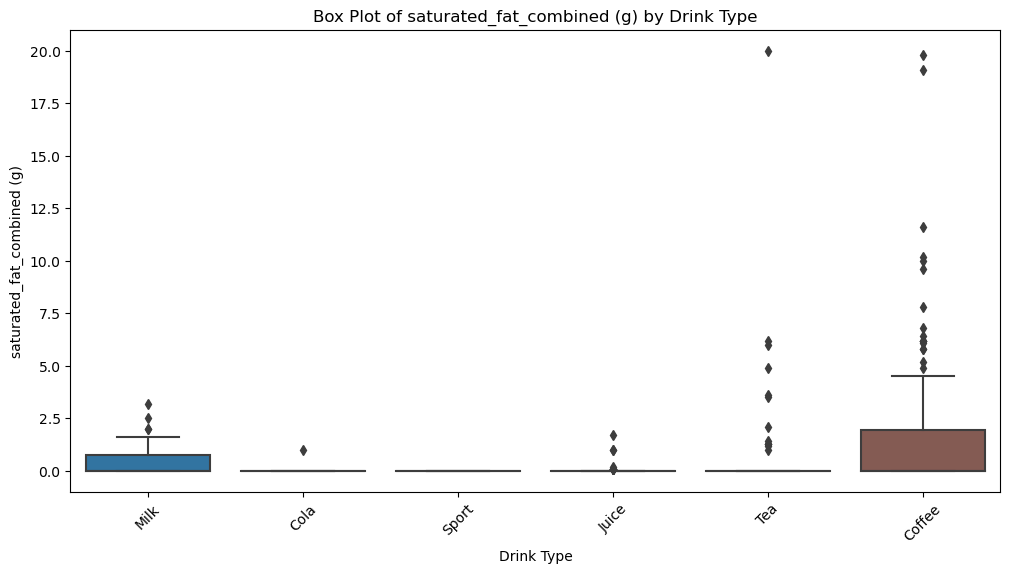

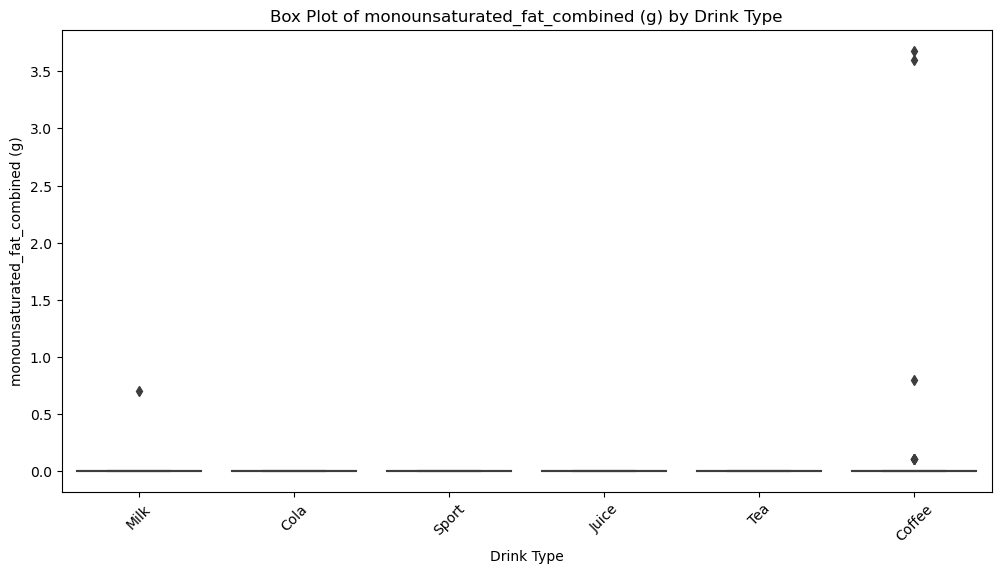

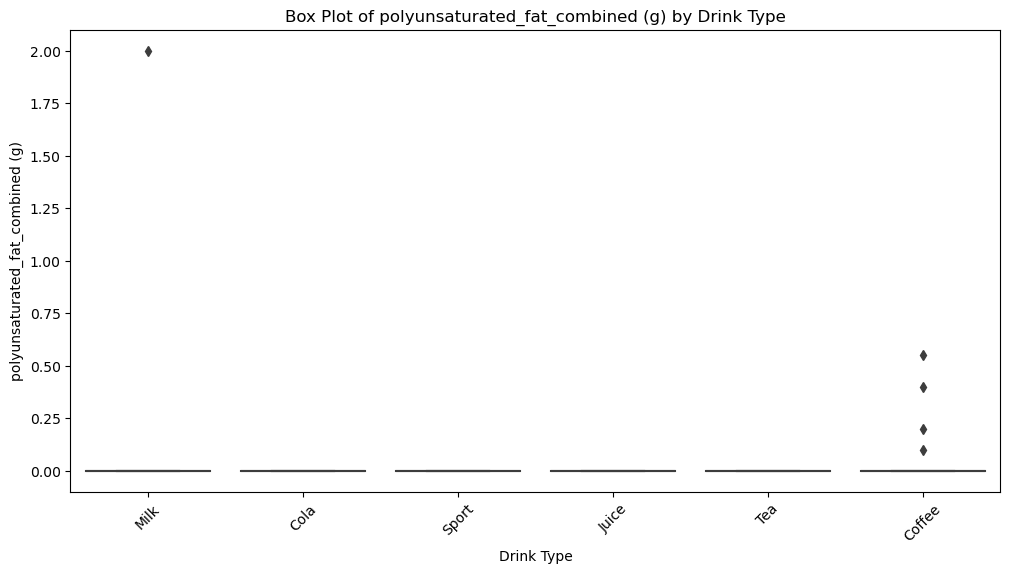

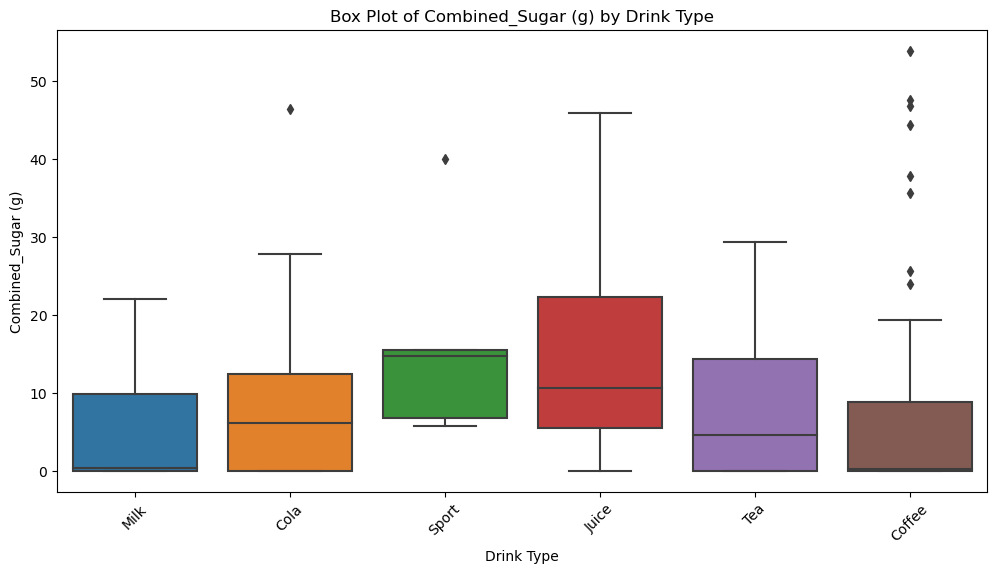

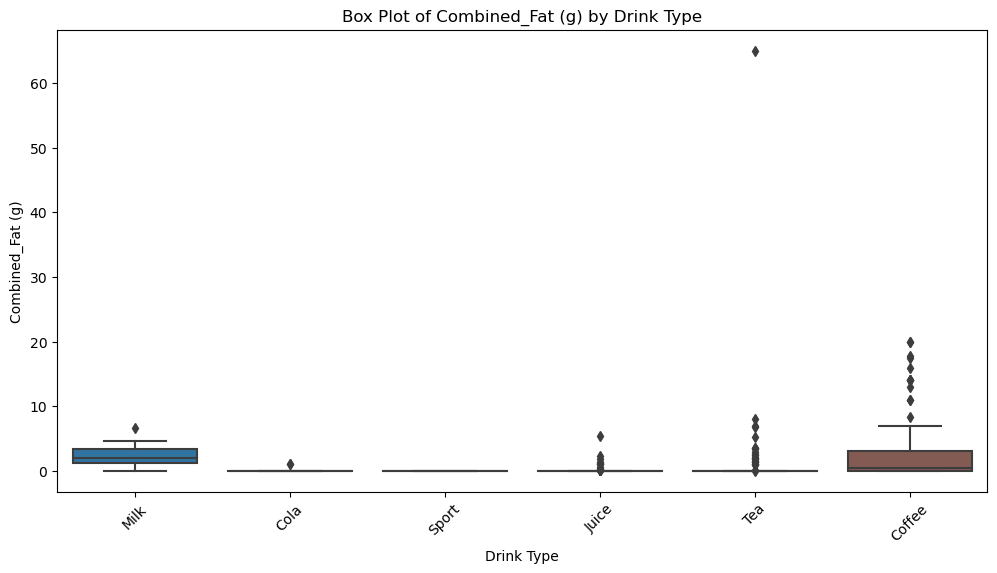

In [207]:
# Scanning the df for outliers
# Select only the columns containing nutrient information and 'drink_type'
nutrient_columns = ['Added_Sugar_combined (g)', 'protein_total (g)',
                    'Calories (kcal)', 'Fibre (g)', 'Carbohydrates',
                    'cholesterol (mg)', 'Sodium Content (mg)', 'trans_fat_combined (g)',
                    'saturated_fat_combined (g)', 'monounsaturated_fat_combined (g)', 
                    'polyunsaturated_fat_combined (g)', 'Combined_Sugar (g)', 'Combined_Fat (g)']

# Create a box plot for each nutrient grouped by 'drink_type'
for nutrient in nutrient_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=drink_type, x='drink_type', y=nutrient)
    plt.xticks(rotation=45)
    plt.title(f'Box Plot of {nutrient} by Drink Type')
    plt.xlabel('Drink Type')
    plt.ylabel(nutrient)
    plt.show()

## Interpreting the outliers

As is clear from the box plots, there are outliers in the dataset. These outliers likely arise due to the existence of various sub groups within the categories. For e.g., the category 'Milk' contains flavoured milk, milk based alternatives etc. that are constitutionally different from milk in some nutrients (flavoured milk might contain more sugar, for instance).

How do we deal with them? Ideally, these various sub groups should also be recorded and stored, but in this case, due to time constraints and the initial dataset having a limited number of items, this is not a valid option. These outliers should be represented in the categories somehow, however. Thus, the mean will be used to compute summary statistics for each nutrient grouped by drink type. The mean is influenced by outliers, meaning that the various sub groups will be represented atleast in part. If this project is to be reproduced in the future, it is recommended that enough data is scraped and the sub groups are recorded.

## Computing Summary of Nutrients by Drink Type

In [208]:
# As concluded earlier, the mean will be used to group the data
mean_nutrient_contents = drink_type.groupby('drink_type').mean()
# Display the result
mean_nutrient_contents

C:\Users\gauta\AppData\Local\Temp\ipykernel_26948\1749851277.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_nutrient_contents = drink_type.groupby('drink_type').mean()


,Added_Sugar_combined (g),protein_total (g),Calories (kcal),Fibre (g),Carbohydrates,cholesterol (mg),Sodium Content (mg),trans_fat_combined (g),saturated_fat_combined (g),monounsaturated_fat_combined (g),polyunsaturated_fat_combined (g),Combined_Sugar (g),Combined_Fat (g)
drink_type,,,,,,,,,,,,,
Coffee,0.107692,2.793077,78.856669,0.759580,11.242238,1.721399,58.569231,0.016154,1.622657,0.059301,0.008741,5.804685,2.494965
Cola,0.413793,0.037931,44.172414,0.034483,10.734483,0.000000,7.422414,0.000000,0.034483,0.000000,0.000000,8.158621,0.068966
Juice,0.000000,0.235417,64.156250,0.409375,16.350077,0.000000,29.950937,0.000000,0.048958,0.000000,0.000000,14.647917,0.173437
Milk,0.291667,3.079167,73.553203,1.867500,13.704722,264.500000,53.250000,0.002806,0.525833,0.019444,0.055556,5.255556,2.316667
Sport,0.000000,0.200000,63.360000,0.000000,16.720000,0.000000,53.600000,0.000000,0.000000,0.000000,0.000000,16.580000,0.000000
Tea,0.046078,0.349431,53.043510,0.284314,21.268706,2.970588,77.889804,0.000980,0.527451,0.000000,0.000000,7.493137,1.228667


## Inferences

We can clearly see that different drink types generally have differing nutritional compositions. The Coffee and Milk categories share some similarities likely as many of the scraped RTD coffee beverages contain milk. Also it is worth noting that while some milk types contain relatively higher cholesterol levels, milk is not usually high in cholesterol. The big number there is the result of one particularly egregious outlier (which can be seen on the box plot).

We have now sucessfully summarised and grouped our data by the various categories. Which nutrients should we focus on? Are there any gaps in Singaporean's diets that beverages can help supplement?

## Gaps in Singaporean's diets

The current nutrigrade label takes into consideration Sugar and Saturated Fat content. Our proposed nutrigrade label also factors in sodium content to provide a more holistic picture. 

In this EDA, we try to find out if there are other nutrients that Singaporean's are not consuming enough of, and if there are any drink types that can fill this gap. Drinks by themselves may not be a significant source of some of these nutrients, but they can act as good supplements to a balanced diet. 

Our dataset does not provide information about people's intake of nutrients. Thus, some secondary research has been conducted to ascertain this. Through the secondary research, 3 broad age groups were identified. The groups, and their dietary requirements are as follows:
-  **Children (aged 5 - 17):** Require more dietary fibre to facilitate healthier digestive systems. Also require more protein to develop muscles and improve their immune system. Children in Singapore are consuming less than their Recommended Daily Allowance (RDA) for Fibre and Protein.
-  **Adults (aged 18-60):** Require more dietary fibre to facilitate better metabolism. Also need more energy to cope with daily requirements. 30% of Adults in Singapore consume less then their RDA for Fibre and Energy.
-  **Elderly (aged 60+):** Requred more dietry fibre to regulate fragile digestive systems. Aslo require more protein to help combat muscle decay. The elderly in Singapore are consuming less then their RDA for Fibre and Energy.

It is observed that the 3 age groups have some overlapping dietary requirements (albeit for different reasons). This should help in making targeting more efficient, as the same beverage can be targeted to multiple groups.

From this point on, the EDA will focus on these 3 items (Fibre, Protein, and Energy), and will conclude with drink recommendations for each age group. Note that the references for all secondary research have been provided at the end of this notebook.

## Fibre

Now, let us create a simple visualisation to gauge fibre content across drink types.

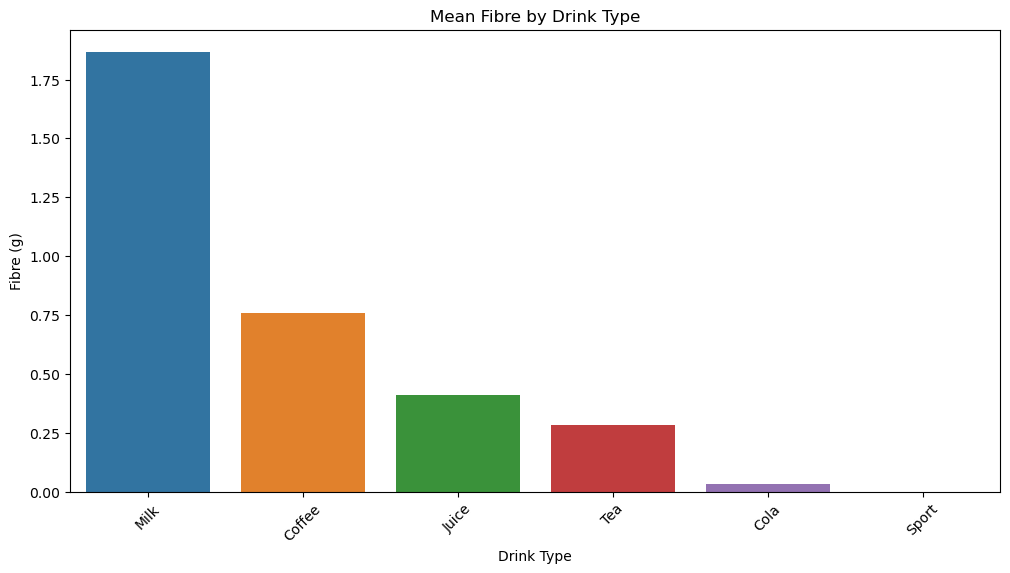

In [209]:
# Sort the DataFrame by 'Fibre (g)' in descending order
mean_nutrient_contents = mean_nutrient_contents.sort_values(by= 'Fibre (g)', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_nutrient_contents.index, y='Fibre (g)', data=mean_nutrient_contents)
plt.xticks(rotation=45)
plt.xlabel('Drink Type')
plt.ylabel('Fibre (g)')
plt.title('Mean Fibre by Drink Type')
plt.show()

## Inferences about Fibre content

It is observed that Milk has the highest average fibre content of all the drink types. This is likely as the data contains oat milk, which has a relatively high fibre content. Thus, milk and oat milk in particular would make a good supplement to increase daily fibre intake.

It is also worth noting that while most juices are not good sources of Fibre, pulpy juices (like orange juice with pulp) has a relatively high fibre content and can also be considered for increasing fibre intake.

## Energy (Calories)

As with Fibres, a bar graph will help to gauge energy contents across various drink types.

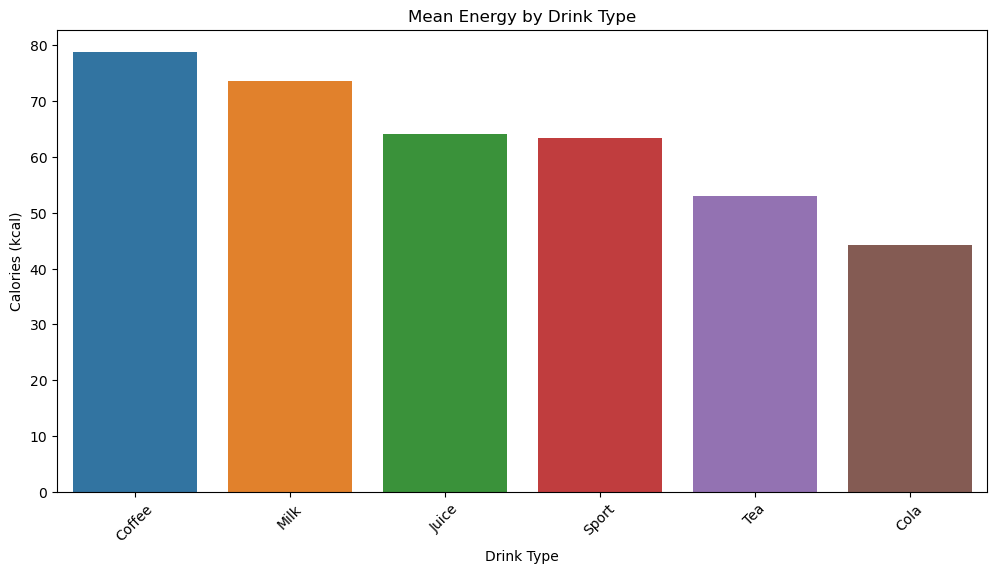

In [211]:
# Sort the DataFrame by 'calories' in descending order
mean_nutrient_contents = mean_nutrient_contents.sort_values(by='Calories (kcal)', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_nutrient_contents.index, y='Calories (kcal)', data=mean_nutrient_contents)
plt.xticks(rotation=45)
plt.xlabel('Drink Type')
plt.ylabel('Calories (kcal)')
plt.title('Mean Energy by Drink Type')
plt.show()

## Inferences about Energy (Calorie) content

It is observed that coffee on average contains the highest energy. This is likely as coffee contains caffiene, a stimulant that has been shown to increase energy levels and decrease fatigue by altering levels of certain neurotransmitters in the brain.

Thus, coffee and milk (especially whole milk) are useful supplements to increase energy intake. It should be noted that due to the caffiene content, coffee is generally harmful and unsuitable for children.

## Protein

As with the above nutrients, a bar graph will be used to visualise protein content across drink types.

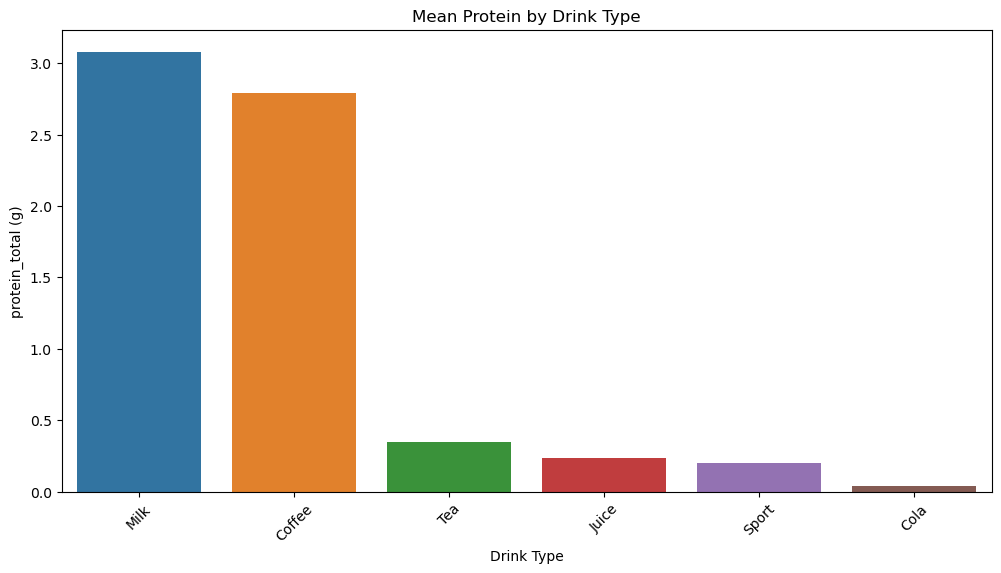

In [212]:
# Sort the DataFrame by 'health_score' in descending order
mean_nutrient_contents = mean_nutrient_contents.sort_values(by='protein_total (g)', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_nutrient_contents.index, y='protein_total (g)', data=mean_nutrient_contents)
plt.xticks(rotation=45)
plt.xlabel('Drink Type')
plt.ylabel('protein_total (g)')
plt.title('Mean Protein by Drink Type')
plt.show()

## Inferences about Protein content

As expected, milk has the highest amount of protein among the various drink types. The protein in milk is of high quality, containing all the essential amino acids that the body needs. Thus, milk is ideal for increasing the protein intake.

It is worth noting that coffee by itself is not a significant source of protein, but Milk Coffees/Latte can be.

## Action points based on the EDA

Based on the EDA, the HPB of Singapore can consider the following actions:
-  **Children (aged 5 - 17)**
    -  Push beverages like milk (especially oat milk) and pulpy juices to increase fibre intake.
    -  Milk will also help increase the protein intake, reducing risk of malnutrition.
    
-  **Adults (aged 18-60)**
    -  Push beverages like coffee and whole milk to increase energy and fibre intake.
    -  As with children, pulpy juices can also be targeted towards this age group.
    
-  **Elderly (aged 60+)**
    -  The HPB can push and target milk/milk based beverages to this age group to help increase protien intake and fight muscle decay.
    -  Milk will also help increase fibre intake. Juices may not be ideal (due to the sugar content), but specific teas (like matcha) could also help to increase fibre intake.

Apart from these, there are a few general insights that may be useful to the HPB:
-  Sports drinks are high on sugar, and are generally only meant to be consumed casually. However, these are still consumed on a casual basis.
-  The HPB can consider stricter measures (like explicit warnings on packaging) to curtail the casual consumption of sports drinks.


## Action points to NTUC

-  As noted earlier, the NTUC house brands do not occur frequently which is cause for concern given that the data has been scraped from the NTUC website.
-  NTUC could try promoting their drink products more aggressively, like ensuring their beverages are among the first few search results on their website.
-  They could try a differentiation strategy on the basis of the nutrient content of their drinks. For instance, they could produce drinks rich in fibre or protein and market them to the above demographics.

## Conclusion

-  Through a combination of exploring the dataset and secondary research, this EDA has answered the questions posed at the start, also making recommendations to various stakeholders
-  The next notebook will cover the modelling and ML techniques used to create, determine our improved nutrigrade labels, also touching upon how our model can predict labels for beverages.
-  The EDA can be improved by scraping more data, creating sub groups for more tailored action points, and including a wider variety of nutrients (for instance, Singaporeans are not consuming enough "good fats".

## References


https://www.straitstimes.com/singapore/4-in-5-elderly-singaporeans-who-are-at-risk-of-malnutrition-have-low-muscle-mass-study
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10421189/#:~:text=Inadequate%20dietary%20calcium%20intake%20was,in%20dietary%20fiber%20and%20calcium.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7612427/
https://www.healthhub.sg/live-healthy/recommended_dietary_allowances
https://www.healthline.com/nutrition/top-evidence-based-health-benefits-of-coffee#:~:text=Coffee%20contains%20caffeine%2C%20a%20stimulant,certain%20neurotransmitters%20in%20the%20brain.
https://www.webmd.com/diet/health-benefits-matcha
https://www.fairprice.com.sg/search?query=drinks
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5149046/#:~:text=Bovine%20milk%20protein%20is%20considered,requirements%20(3%2D4).
https://msgt.com.sg/should-singapore-implement-stricter-measures-on-energy-drinks/
https://www.webmd.com/diet/health-benefits-orange-juic
https://healthcareweekly.com/protein-coffee-benefits/#:~:text=Is%20Coffee%20On%20Its%20Own,meaningful%2C%20to%20say%20the%20least.